In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=6b67b1db2d0670d7543892703c0e4c3394937af7a336c90727aba7fdb985773d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,random_state = 0)

0.9906103286384976 0.972027972027972


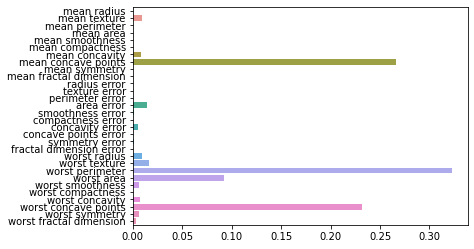

In [4]:
model = GradientBoostingClassifier(random_state=0,max_depth =1)
model.fit(train_x,train_y)

# 평가
print(model.score(train_x,train_y),model.score(test_x,test_y))

# 특성 중요도 시각화
sns.barplot(model.feature_importances_,y = cancer.feature_names)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 데이터 로드
x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
train_x,test_x,train_y,test_y = train_test_split(x, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [6]:
from sklearn.ensemble import AdaBoostClassifier

# 모델 학습
model = AdaBoostClassifier(n_estimators=5,random_state = 0) #트리개수 5개
model.fit(train_x,train_y)
# 평가
print(model.score(train_x,train_y),model.score(test_x,test_y))


0.9066666666666666 0.8


'\n표를 보면서 두개의 데이터가 많이 틀린쪽으로 가중치가 치우쳐 진다.\n분리 선을 왔다 갔다 하면서 분할을 수행한다.\n\n'

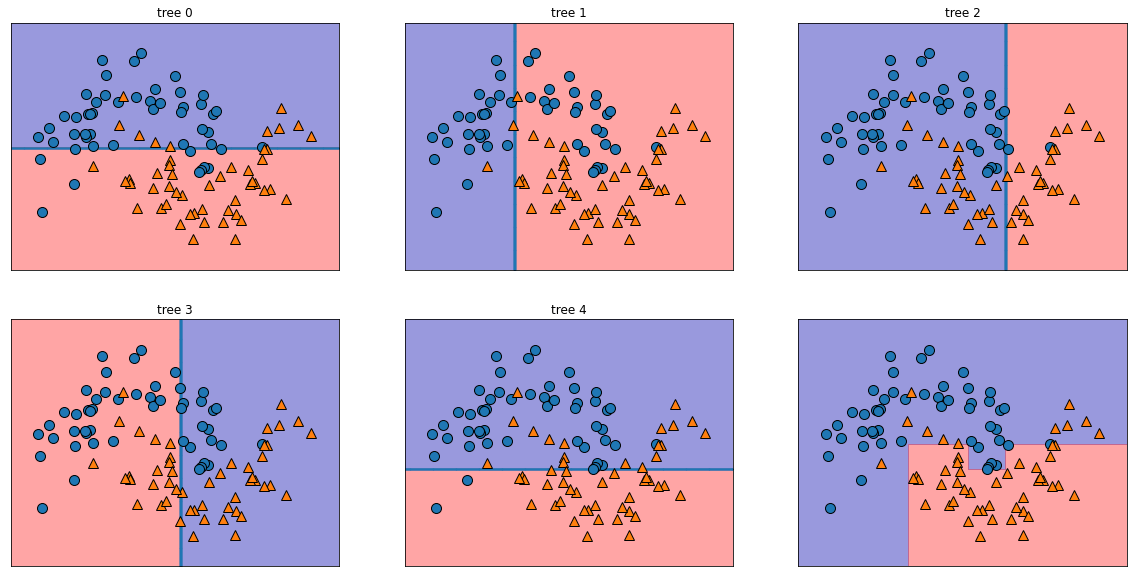

In [7]:
import mglearn

# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10) )
for i, (tree, ax) in enumerate( zip(model.estimators_, axes.ravel()) ):
  mglearn.plots.plot_tree_partition(x, y, tree, ax=ax)
  ax.set_title(f'tree {i}')

mglearn.plots.plot_2d_separator(model, x, ax=axes[-1, -1],fill = True,alpha = 0.4)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

'''
표를 보면서 두개의 데이터가 많이 틀린쪽으로 가중치가 치우쳐 진다.
분리 선을 왔다 갔다 하면서 분할을 수행한다.

'''

0.9859154929577465 0.972027972027972


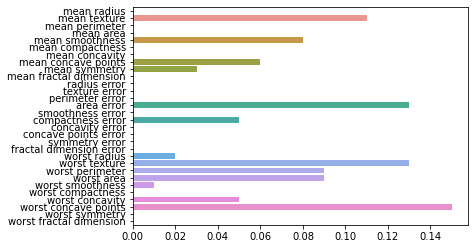

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)
# 모델 학습
model = AdaBoostClassifier(random_state=0,n_estimators=100,learning_rate=0.07)
model.fit(train_x,train_y)
# 평가
print(model.score(train_x,train_y),model.score(test_x,test_y))

# 특성 중요도 시각화
sns.barplot(model.feature_importances_,y=cancer.feature_names)

In [9]:
import xgboost
xgboost.__version__

'0.90'

0.9953051643192489 0.993006993006993


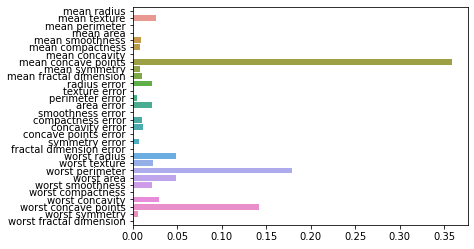

In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 데이터 로드
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df['label'] = cancer.target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

# 모델 학습
model = XGBClassifier(random_state=0,max_depth = 2,learning_rate=0.07)
model.fit(train_x,train_y)
# 평가
print(model.score(train_x,train_y) , model.score(test_x,test_y))
# 특성 중요도 시각화
sns.barplot(model.feature_importances_,y=cancer.feature_names)

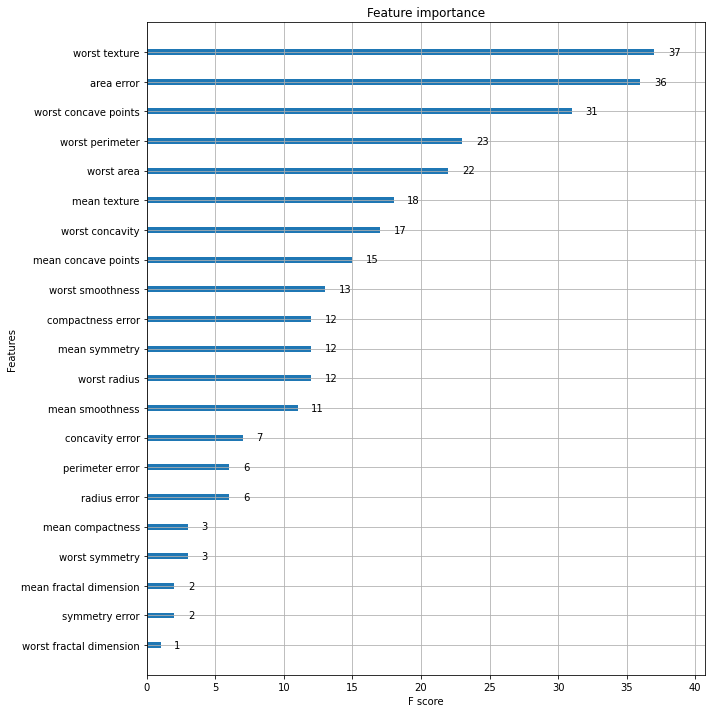

In [11]:
# plot_importance() 이용
import matplotlib.pyplot as plt
from xgboost import plot_importance #시각화 툴이 있음 ㄷㄷ
fig,ax = plt.subplots(figsize = (10,12))
ylabel = list(cancer.feature_names)
plot_importance(model,ax = ax)


##LightGBM


In [14]:
#import 
import lightgbm
lightgbm.__version__

'2.2.3'

0.9929577464788732 0.986013986013986


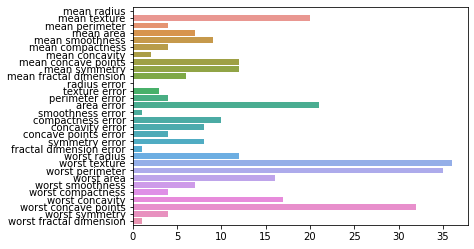

In [17]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df['label'] = cancer.target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

#model 학습 
model = LGBMClassifier(random_state = 0 ,max_depth = 2 ,learning_rate=0.07,n_estimators=100)
model.fit(train_x,train_y)

#평가 
print(model.score(train_x,train_y),model.score(test_x,test_y))

#특성 중요도 시각화 
sns.barplot(model.feature_importances_,y=cancer.feature_names)

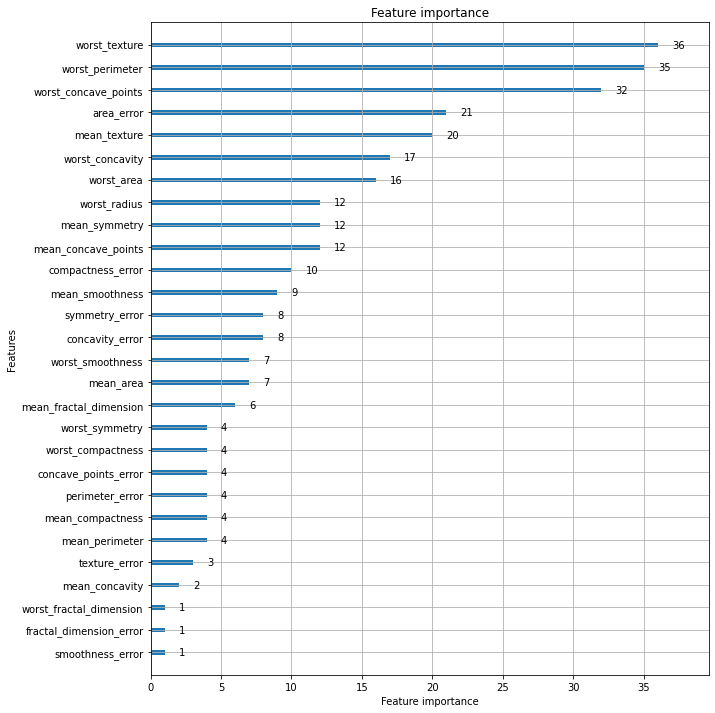

In [19]:
#plot_importance
from lightgbm import plot_importance
fig,ax = plt.subplots(figsize = (10,12))
ylabel = list(cancer.feature_names) #plot_importance 는 ylabel 을 list 형태로 만들어야 한다.
plot_importance(model,ax = ax)